# K-Means clustering of Twitter Accounts

This is our first attemp to cluster twitter accounts.

We used a very simple bag-of-words methodology to extract information from twitter accounts.
Then we clustered them as politics and sports.
We clustered accounts with k-means clustering. 

0. We have text files for each twitter account which includes last 100 tweets of this account.
1. Bag-of-words:
  1. Extract words from all tweets.
  2. Choose words that are at least used by 5 accounts and put them in a list. This will be our dictionary.
2. Create a word vector like dictionary for each account.
  1. If a word from dictionary exist in the tweets of the account, put 1, else 0 in the word vector. (Binary)
  2. Append all the lists into one big list.
3. Use K-Means clustering.
4. To plot data, to decrease dimensionality of vectors to 2D, we used cluster center vectors like points of each word.
5. Find most used words for each cluster.
  1. Choose most used words from cluster 1 and take them as most used if those words are not used in cluster 2 frequently. 

In [18]:
from sklearn.cluster import KMeans
import numpy as np
import re
import os
import matplotlib.pyplot as plt

* Bag-of-words:
  * Extract words from all tweets.
  * Choose words that are at least used by 5 accounts and put them in a list. This will be our dictionary.

In [19]:
f = open('ALL', 'r', encoding='utf-8')

words = re.split('\W+', f.read())

f.close()

ctr = {}

for w in words:
	if w not in ctr:
		ctr[w] = 1
	else:
		ctr[w] = ctr[w] + 1

In [20]:
wordsAll = []

for k in iter(ctr):
	if(ctr[k] > 4 and k != "t" and k != "co" and k != "https"):
		wordsAll.append(k) 
	#f.write(ctr[k] + " - " + k)

dictTemp = {}

for w in wordsAll:
	dictTemp[w] = 0

listGeneral = []
labels = []

qwe = 1

* Create a word vector like dictionary for each account.
  * If a word from dictionary exist in the tweets of the account, put 1, else 0 in the word vector. (Binary)
  * Append all the lists into one big list.

In [21]:
for file in os.listdir("allTweets"):
	labels.append(file)
	print(str(qwe) + " " + file)
	qwe = qwe+1
	path = "allTweets\\" + file
	f = open(path, 'r', encoding='utf-8')
	words = re.split('\W+', f.read())
	f.close()

	dic = dict(dictTemp)

	for w in words:
		if w in dic:
			dic[w] = 1

	l = []
	l2 = []
	for k in iter(dic):
		l.append([k, dic[k]])
	l.sort()
	for i in l:
		l2.append(i[1])

	listGeneral.append(l2)

1 ahmetcakar1
2 ahmethc
3 Akparti
4 Besiktas
5 cumhuriyetgzt
6 cuneytozdemir
7 ertemsener
8 Fenerbahce
9 GalatasaraySK
10 herkesicinCHP
11 kilicarslan_is
12 kilicdarogluk
13 ntvspor
14 NumanKurtulmus
15 RT_Erdogan
16 Sabah
17 say_cem
18 sporx
19 TC_Basbakan
20 trtspor


In [22]:
for file in os.listdir("testData"):
	labels.append(file)
	print(str(qwe) + " " + file)
	qwe = qwe+1
	path = "testData\\" + file
	f = open(path, 'r', encoding='utf-8')
	words = re.split('\W+', f.read())
	f.close()

	dic = dict(dictTemp)

	for w in words:
		if w in dic:
			dic[w] = 1

	l = []
	l2 = []
	for k in iter(dic):
		l.append([k, dic[k]])
	l.sort()
	for i in l:
		l2.append(i[1])

	listGeneral.append(l2)

21 asporcomtr
22 bilkentsiyaset
23 HurriyetSpor
24 medya_siyaset
25 onlinespor
26 SiyasetAlemi
27 SiyasiHaberOrg
28 Turkiye_Spor


* Use K-Means clustering.

In [23]:
kmeansList = np.asarray(listGeneral)

kmeans = KMeans(n_clusters=2, random_state=0).fit(kmeansList)

print(kmeans.labels_)
print("[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8]")

[1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1]
[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8]


* To plot data, to decrease dimensionality of vectors to 2D, we used cluster center vectors like points of each word.

In [24]:
scoresSP0 = []
scoresSP1 = []
labelsSP = []
wordScoresSPx = [0] * len(listGeneral[0])

scoresSY0 = []
scoresSY1 = []
labelsSY = []
wordScoresSYx = [0] * len(listGeneral[0])

for i in range(len(listGeneral)):
	if(kmeans.labels_[i] == 0):
		scoresSP0.append(sum(listGeneral[i] * kmeans.cluster_centers_[0]))
		scoresSP1.append(sum(listGeneral[i] * kmeans.cluster_centers_[1]))
		labelsSP.append(labels[i])
		wordScoresSPx = [x + y for x, y in zip(wordScoresSPx, listGeneral[i])]
	else:
		scoresSY0.append(sum(listGeneral[i] * kmeans.cluster_centers_[0]))
		scoresSY1.append(sum(listGeneral[i] * kmeans.cluster_centers_[1]))
		labelsSY.append(labels[i])
		wordScoresSYx = [x + y for x, y in zip(wordScoresSYx, listGeneral[i])]

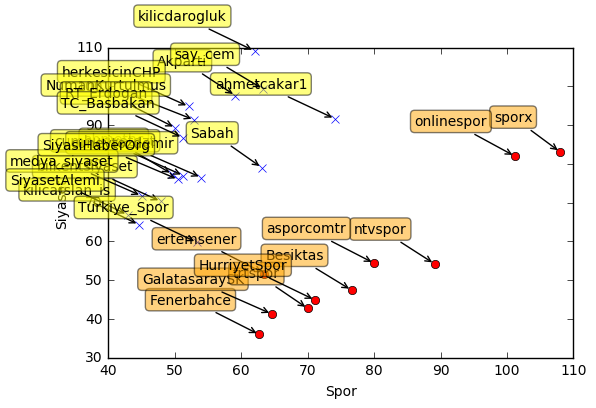

In [25]:
plt.plot(scoresSP0, scoresSP1, 'ro')

for label, x, y in zip(labelsSP, scoresSP0, scoresSP1):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='orange', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.plot(scoresSY0, scoresSY1, 'bx')

for label, x, y in zip(labelsSY, scoresSY0, scoresSY1):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xlabel('Spor')
plt.ylabel('Siyaset')
plt.show()

* Find most used words for each cluster.
  * Choose most used words from cluster 1 and take them as most used if those words are not used in cluster 2 frequently. 

In [26]:
sortedDict = sorted(dictTemp)
dicSP = dict(dictTemp)
dicSY = dict(dictTemp)

wordScoresSP = []
wordScoresSY = []

for i in range(len(wordScoresSPx)):
	wordScoresSP.append([wordScoresSPx[i],sortedDict[i]])
	dicSP[sortedDict[i]] = wordScoresSPx[i]
	wordScoresSY.append([wordScoresSYx[i],sortedDict[i]])
	dicSY[sortedDict[i]] = wordScoresSYx[i]

wordScoresSP.sort()
wordScoresSY.sort()

qwe = 0
print("Populer spor kelimleri:")
for i in range(1,len(wordScoresSPx)):
	j = len(wordScoresSPx) - i
	if(dicSY[wordScoresSP[j][1]] < len(labelsSY)/2):
		print(wordScoresSP[j][1] + " - " + str(wordScoresSP[j][0]))
		qwe = qwe + 1
	if(qwe == 5):
		break

qwe = 0
print("Populer siyaset kelimeleri:")
for i in range(1,len(wordScoresSY)):
	j = len(wordScoresSYx) - i
	if(dicSP[wordScoresSY[j][1]] < len(labelsSP)/2):
		print(wordScoresSY[j][1] + " - " + str(wordScoresSY[j][0]))
		qwe = qwe + 1
	if(qwe == 5):
		break

Populer spor kelimleri:
sonra - 10
Beşiktaş - 10
maçı - 9
maç - 9
Fenerbahçe - 9
Populer siyaset kelimeleri:
ne - 18
daha - 17
kadar - 16
gibi - 16
olan - 14
